In [4]:
import pandas as pd
from scipy import stats
import statsmodels.formula.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('datasets/clean/interim_clean_dataset_2021-07-19.csv')
df['rural_urban_code'] = df['rural_urban_code'].astype('category')
df['urban_influence_code'] = df['urban_influence_code'].astype('category')
df['state'] = df['state'].astype('category')
df['division'] = df['division'].astype('category')
df['region'] = df['region'].astype('category')
df['vaccine_hesitant_category'] = df['vaccine_hesitant_category'].astype('category')

columns = ['vaccine_hesitant', 'vaccine_hesitant_strong', 'ethnicity_white', 'ethnicity_hispanic', 'ethnicity_black', 'ethnicity_asian', 'ethnicity_native', 'ethnicity_hawaiian', 'population', 'birth_rate', 'unemployment', 'rural_urban_code', 'urban_influence_code', 'median_income', 'education_high_school_only', 'education_bachelors_degree', 'religion_total', 'religion_evangelical', 'religion_mainline_protestant', 'election_democrat_wins', 'election_republican_wins', 'election_total_2008', 'election_dem_2008', 'election_gop_2008', 'election_oth_2008', 'election_total_2012', 'election_dem_2012', 'election_gop_2012', 'election_oth_2012', 'election_total_2016', 'election_dem_2016', 'election_gop_2016', 'election_oth_2016', 'election_gop_2020', 'election_dem_2020']
independent_variables = columns[2:] # drop first two columns containing dependent variable names for list of independent variables

## QQ Plots

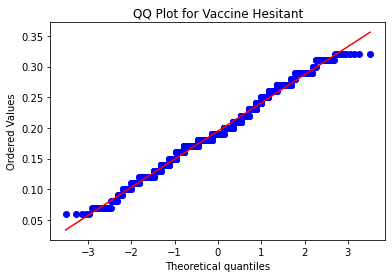

In [6]:
stats.probplot(x=df['vaccine_hesitant'], dist='norm', plot=plt)
plt.title('QQ Plot for Vaccine Hesitant')
plt.show()

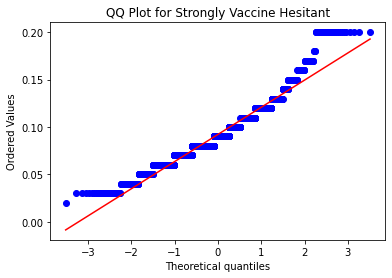

In [7]:
stats.probplot(x=df['vaccine_hesitant_strong'], dist='norm', plot=plt)
plt.title('QQ Plot for Strongly Vaccine Hesitant')
plt.show()

We do a QQ plot on our two dependent vaccine hesitant variables to determine if our data is normalized. The `vaccine_hesitant` graph is relatively normally distributed. However the `vaccine_hesitant_strong` graph is less so with both tails being above the expected values i.e. fat tailed. This suggests to us to use a Box-Cox Lambda transformation on them, or at least `vaccine_hesitant_strong`, to get normalized data to do our modelling on. 

## Box-Cox Lambda transformation

In [8]:
vaccine_hesitant_transformed, lambda_vaccine_hesitant = stats.boxcox(df['vaccine_hesitant'])
vaccine_hesitant_strong_transformed, lambda_vaccine_hesitant_strong = stats.boxcox(df['vaccine_hesitant_strong'])
df['vaccine_hesitant_transformed'] = vaccine_hesitant_transformed
df['vaccine_hesitant_strong_transformed'] = vaccine_hesitant_strong_transformed

lambda_vaccine_hesitant, lambda_vaccine_hesitant_strong

(0.8265990742746657, 0.3313582508560165)

Our Box-Cox transformation gives us lambda values of 0.8 and 0.3 for `vaccine_hesitant` and `vaccine_hesitant_strong` respectively. The former is close to 1, which means no transformation is required and it is normally distributed. The latter is much smaller than 1, so the transformation will apply a fractional exponent like square root to arrive at the transformed values.

## Linear Regression
### Non-Transformed Vaccine Hesitancy Models
#### Vaccine Hesitant

In [9]:
fitted_model_hesitant = sm.ols(formula='vaccine_hesitant ~ ' + ' + '.join(independent_variables), data=df).fit()
fitted_model_hesitant.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       vaccine_hesitant   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     51.68
Date:                Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                        21:29:53   Log-Likelihood:                 5965.3
No. Observations:                3075   AIC:                        -1.184e+04
Df Residuals:                    3030   BIC:                        -1.157e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0149      0.005      2.819      0.005       0.005       0.025
rural_urban_code[T.2.0]          0.0022      0.002      1.471      0.141      -0.001       0.005
rural_urban_code[T.3.0]          0.0022      0.002      1.363      0.173      -0.001       0.005
rural_urban_code[T.4.0]          0.0008      0.003      0.245      0.806      -0.006       0.007
rural_urban_code[T.5.0]          0.0085      0.004      2.004      0.045       0.000       0.017
rural_urban_code[T.6.0]          0.0053      0.002      2.283      0.022       0.001       0.010
rural_urban_code[T.7.0]          0.0063      0.003      2.374      0.018       0.001       0.012
rural_urban_code[T.8.0]          0.0038      0.003      1.095      0.273      -0.003       0.011
rural_urban_code[T.9.0]          0.0102      0.003      3.405      0.001       0.004       0.016
urban_influence_code[T.2.0]      0.0044      0.002      2.667      0.008       0.001       0.008
urban_influence_code[T.3.0]      0.0058      0.003      1.733      0.083      -0.001       0.012
urban_influence_code[T.4.0]     -0.0092      0.003     -3.143      0.002      -0.015      -0.003
urban_influence_code[T.5.0]      0.0023      0.003      0.877      0.380      -0.003       0.007
urban_influence_code[T.6.0]   8.115e-05      0.002      0.033      0.974      -0.005       0.005
urban_influence_code[T.7.0]      0.0110      0.004      2.874      0.004       0.004       0.019
urban_influence_code[T.8.0]      0.0083      0.002      3.412      0.001       0.004       0.013
urban_influence_code[T.9.0]      0.0039      0.003      1.284      0.199      -0.002       0.010
urban_influence_code[T.10.0]     0.0058      0.003      1.791      0.073      -0.001       0.012
urban_influence_code[T.11.0]     0.0020      0.004      0.553      0.581      -0.005       0.009
urban_influence_code[T.12.0]     0.0052      0.004      1.447      0.148      -0.002       0.012
ethnicity_white                  0.0640      0.048      1.344      0.179      -0.029       0.157
ethnicity_hispanic               0.0033      0.047      0.069      0.945      -0.090       0.096
ethnicity_black                  0.1542      0.047      3.254      0.001       0.061       0.247
ethnicity_asian                 -0.0707      0.065     -1.087      0.277      -0.198       0.057
ethnicity_native                 0.1700      0.052      3.284      0.001       0.069       0.272
ethnicity_hawaiian               0.0010      0.228      0.004      0.996      -0.447       0.449
population                    1.977e-08    1.7e-08      1.160      0.246   -1.37e-08    5.32e-08
birth_rate                       0.3114      0.032      9.670      0.000       0.248       0.375
unemployment                    -0.2169      0.056     -3.871      0.000    

In [10]:
df_fitted_model_hesitant = pd.DataFrame({'coeffs': fitted_model_hesitant.params, 'pvalue': fitted_model_hesitant.pvalues}).reset_index().rename(columns={'index': 'feature'})
df_fitted_model_hesitant = df_fitted_model_hesitant[df_fitted_model_hesitant['pvalue'] < 0.05].sort_values('coeffs', ascending=False)
df_fitted_model_hesitant

,feature,coeffs,pvalue
27,birth_rate,3.113957e-01,8.340856e-22
24,ethnicity_native,1.700214e-01,1.035766e-03
22,ethnicity_black,1.542054e-01,1.148410e-03
36,election_republican_wins,3.331155e-02,1.621821e-03
35,election_democrat_wins,2.624386e-02,1.315049e-02
0,Intercept,1.488885e-02,4.849556e-03
14,urban_influence_code[T.7.0],1.102951e-02,4.075319e-03
8,rural_urban_code[T.9.0],1.023728e-02,6.707664e-04
4,rural_urban_code[T.5.0],8.521338e-03,4.516946e-02
15,urban_influence_code[T.8.0],8.257771e-03,6.531829e-04


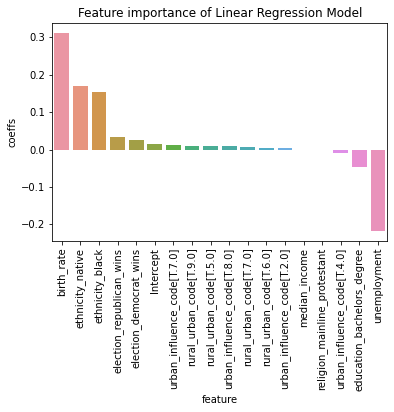

In [11]:
sns.barplot(data=df_fitted_model_hesitant, x='feature', y='coeffs').set_title('Feature importance of Linear Regression Model')
_ = plt.xticks(rotation=90)



#### Strongly Vaccine Hesitant

In [12]:
model_fitted_hesitant_strong = sm.ols(formula='vaccine_hesitant_strong ~ ' + ' + '.join(independent_variables), data=df).fit()
model_fitted_hesitant_strong.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     vaccine_hesitant_strong   R-squared:                       0.289
Model:                                 OLS   Adj. R-squared:                  0.279
Method:                      Least Squares   F-statistic:                     28.05
Date:                     Tue, 10 Aug 2021   Prob (F-statistic):          1.06e-189
Time:                             21:29:54   Log-Likelihood:                 7024.8
No. Observations:                     3075   AIC:                        -1.396e+04
Df Residuals:                         3030   BIC:                        -1.369e+04
Df Model:                               44                                         
Covariance Type:                 nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0075      0.004      2.014      0.044       0.000       0.015
rural_urban_code[T.2.0]          0.0016      0.001      1.481      0.139      -0.001       0.004
rural_urban_code[T.3.0]          0.0019      0.001      1.614      0.107      -0.000       0.004
rural_urban_code[T.4.0]          0.0020      0.002      0.861      0.389      -0.003       0.007
rural_urban_code[T.5.0]          0.0035      0.003      1.157      0.247      -0.002       0.009
rural_urban_code[T.6.0]          0.0028      0.002      1.685      0.092      -0.000       0.006
rural_urban_code[T.7.0]          0.0041      0.002      2.194      0.028       0.000       0.008
rural_urban_code[T.8.0]          0.0043      0.002      1.732      0.083      -0.001       0.009
rural_urban_code[T.9.0]          0.0063      0.002      2.959      0.003       0.002       0.010
urban_influence_code[T.2.0]      0.0034      0.001      2.921      0.004       0.001       0.006
urban_influence_code[T.3.0]      0.0047      0.002      2.015      0.044       0.000       0.009
urban_influence_code[T.4.0]     -0.0056      0.002     -2.706      0.007      -0.010      -0.002
urban_influence_code[T.5.0]      0.0021      0.002      1.131      0.258      -0.002       0.006
urban_influence_code[T.6.0]      0.0032      0.002      1.851      0.064      -0.000       0.007
urban_influence_code[T.7.0]      0.0046      0.003      1.694      0.090      -0.001       0.010
urban_influence_code[T.8.0]      0.0058      0.002      3.394      0.001       0.002       0.009
urban_influence_code[T.9.0]      0.0034      0.002      1.576      0.115      -0.001       0.008
urban_influence_code[T.10.0]     0.0016      0.002      0.700      0.484      -0.003       0.006
urban_influence_code[T.11.0]     0.0008      0.003      0.324      0.746      -0.004       0.006
urban_influence_code[T.12.0]     0.0023      0.003      0.913      0.361      -0.003       0.007
ethnicity_white                  0.0119      0.034      0.353      0.724      -0.054       0.078
ethnicity_hispanic              -0.0147      0.034     -0.439      0.661      -0.081       0.051
ethnicity_black                  0.0406      0.034      1.208      0.227      -0.025       0.106
ethnicity_asian                 -0.0692      0.046     -1.503      0.133      -0.160       0.021
ethnicity_native                 0.0749      0.037      2.041      0.041       0.003       0.147
ethnicity_hawaiian              -0.0348      0.162     -0.215      0.830      -0.352       0.282
population                    1.042e-08   1.21e-08      0.863      0.388   -1.33e-08    3.41e-08
birth_rate                       0.1452      0.023      6.366      0.000       0.101       0.190
unemployment         



### Box-Cox Transformed Models
#### Vaccine Hesitant

In [13]:
fitted_model_hesitant_transformed = sm.ols(formula='vaccine_hesitant_transformed ~ ' + ' + '.join(independent_variables), data=df).fit()
fitted_model_hesitant_transformed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     vaccine_hesitant_transformed   R-squared:                       0.437
Model:                                      OLS   Adj. R-squared:                  0.429
Method:                           Least Squares   F-statistic:                     53.46
Date:                          Tue, 10 Aug 2021   Prob (F-statistic):               0.00
Time:                                  21:29:54   Log-Likelihood:                 5104.1
No. Observations:                          3075   AIC:                        -1.012e+04
Df Residuals:                              3030   BIC:                            -9847.
Df Model:                                    44                                         
Covariance Type:                      nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -0.1082      0.007    -15.489      0.000      -0.122      -0.095
rural_urban_code[T.2.0]          0.0030      0.002      1.523      0.128      -0.001       0.007
rural_urban_code[T.3.0]          0.0027      0.002      1.283      0.200      -0.001       0.007
rural_urban_code[T.4.0]          0.0009      0.004      0.199      0.842      -0.008       0.009
rural_urban_code[T.5.0]          0.0114      0.006      2.030      0.042       0.000       0.022
rural_urban_code[T.6.0]          0.0067      0.003      2.166      0.030       0.001       0.013
rural_urban_code[T.7.0]          0.0079      0.004      2.252      0.024       0.001       0.015
rural_urban_code[T.8.0]          0.0046      0.005      1.010      0.313      -0.004       0.014
rural_urban_code[T.9.0]          0.0129      0.004      3.235      0.001       0.005       0.021
urban_influence_code[T.2.0]      0.0058      0.002      2.637      0.008       0.001       0.010
urban_influence_code[T.3.0]      0.0076      0.004      1.728      0.084      -0.001       0.016
urban_influence_code[T.4.0]     -0.0123      0.004     -3.176      0.002      -0.020      -0.005
urban_influence_code[T.5.0]      0.0029      0.003      0.824      0.410      -0.004       0.010
urban_influence_code[T.6.0]   -7.22e-05      0.003     -0.022      0.982      -0.006       0.006
urban_influence_code[T.7.0]      0.0142      0.005      2.788      0.005       0.004       0.024
urban_influence_code[T.8.0]      0.0106      0.003      3.310      0.001       0.004       0.017
urban_influence_code[T.9.0]      0.0048      0.004      1.199      0.231      -0.003       0.013
urban_influence_code[T.10.0]     0.0077      0.004      1.796      0.073      -0.001       0.016
urban_influence_code[T.11.0]     0.0024      0.005      0.513      0.608      -0.007       0.012
urban_influence_code[T.12.0]     0.0067      0.005      1.419      0.156      -0.003       0.016
ethnicity_white                  0.0836      0.063      1.326      0.185      -0.040       0.207
ethnicity_hispanic               0.0047      0.063      0.075      0.940      -0.118       0.128
ethnicity_black                  0.2024      0.063      3.227      0.001       0.079       0.325
ethnicity_asian                 -0.1058      0.086     -1.230      0.219      -0.274       0.063
ethnicity_native                 0.2218      0.069      3.237      0.001       0.087       0.356
ethnicity_hawaiian              -0.0044      0.302     -0.015      0.988      -0.597       0.588
population                    2.741e-08   2.26e-08      1.215      0.224   -1.68e-08    7.16e-08
birth_rate                       0.4117      0.043      9.662  

After doing a Box-Cox transformation on our data, we note that the R^2 increase is only a marginal increase.

## Modelling

### Pipeline

In [14]:
df_model = df[columns].dropna()

df_dum = pd.get_dummies(df_model)

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Lasso

y = df_dum.vaccine_hesitant.values
X = df_dum.drop(['vaccine_hesitant', 'vaccine_hesitant_strong'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_scaled = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = preprocessing.StandardScaler().fit(X_test).transform(X_test)

### Models
#### Linear Regression

In [15]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_cross_val_scores = cross_val_score(linear_regression, X_train_scaled, y_train, scoring='neg_mean_absolute_error')
print('Linear Regression average Cross Val Score: ', round(np.mean(linear_cross_val_scores), 5))

Linear Regression average Cross Val Score:  -0.02717


##### Feature Selection

In [70]:
linear_features = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(linear_regression.coef_)}).sort_values('importance', ascending=False)
linear_features.head(10)

,feature,importance
7,birth_rate,0.296887
8,unemployment,0.228677
4,ethnicity_native,0.201097
2,ethnicity_black,0.181085
0,ethnicity_white,0.086835
11,education_bachelors_degree,0.064083
5,ethnicity_hawaiian,0.029195
1,ethnicity_hispanic,0.024393
3,ethnicity_asian,0.012124
43,urban_influence_code_4.0,0.012113


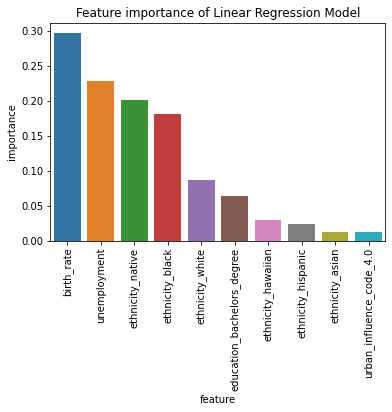

In [82]:
sns.barplot(data=linear_features.head(10), x='feature', y='importance').set_title('Feature importance of Linear Regression Model')
_ = plt.xticks(rotation=90)

#### Lasso

Lasso Model (alpha=1) average Cross Val Score):  -0.0364


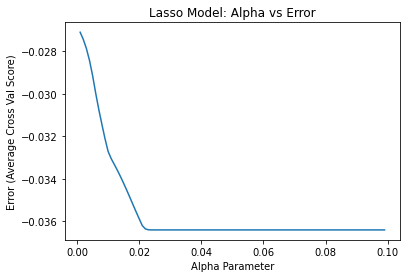

In [71]:
lasso = Lasso(tol=0.01)
lasso.fit(X_train, y_train)
lasso_cross_val_scores = cross_val_score(lasso, X_train_scaled, y_train, scoring='neg_mean_absolute_error')
print('Lasso Model (alpha=1) average Cross Val Score): ', round(np.mean(lasso_cross_val_scores), 5))

alpha = []
error = []
for i in range(1, 100):
    alpha_i = i/1000
    alpha.append(alpha_i)
    lasso_i = Lasso(alpha=alpha_i, tol=0.01)
    error.append(np.mean(cross_val_score(lasso_i, X_train_scaled, y_train, scoring='neg_mean_absolute_error')))

plt.plot(alpha, error)
plt.title('Lasso Model: Alpha vs Error')
plt.xlabel('Alpha Parameter')
_ = plt.ylabel('Error (Average Cross Val Score)')

First we try a lasso model with the default alpha = 1 value. Since it isn't as good as our linear regression model, we then try out different alpha values to see if we can optimize our model better.

Given that our lasso model has the smallest error term at alpha = 0, the lasso model isn't a good fit for our data. An alpha = 0 lasso model is equivalent to ordinary least square and can be solved by the sklearn.LinearRegression model we used above.

##### Feature Selection

In [72]:
lasso_features = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lasso.coef_)}).sort_values('importance', ascending=False)
lasso_features.head(10)

,feature,importance
20,election_oth_2008,3.021665e-06
28,election_oth_2016,1.568015e-06
9,median_income,1.298065e-06
23,election_gop_2012,7.840861e-07
27,election_gop_2016,3.908143e-07
26,election_dem_2016,1.949370e-07
30,election_dem_2020,1.000991e-07
17,election_total_2008,9.042471e-08
29,election_gop_2020,5.789849e-08
21,election_total_2012,3.585427e-08


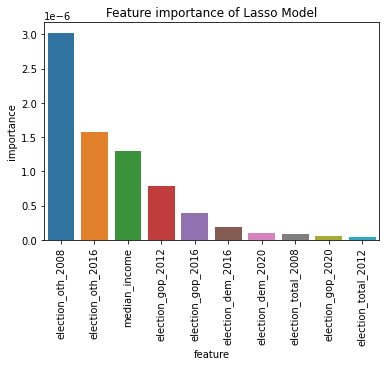

In [73]:
sns.barplot(data=lasso_features.head(10), x='feature', y='importance').set_title('Feature importance of Lasso Model')
_ = plt.xticks(rotation=90)

#### Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
random_forest_cross_val_scores = cross_val_score(random_forest, X_train_scaled, y_train, scoring='neg_mean_absolute_error')


print('Random Forest average Cross Val Score: ', round(np.mean(random_forest_cross_val_scores), 5))

Random Forest average Cross Val Score:  -0.02326


We note that the average cross val score for our random forest model is the best thus far.

##### Feature Importance

In [75]:
random_forest_features = pd.DataFrame({'feature': X_train.columns, 'importance': random_forest.feature_importances_}).sort_values('importance', ascending=False)
random_forest_features.head(5)


,feature,importance
11,education_bachelors_degree,0.108260
2,ethnicity_black,0.101129
9,median_income,0.098768
13,religion_evangelical,0.064882
14,religion_mainline_protestant,0.064813


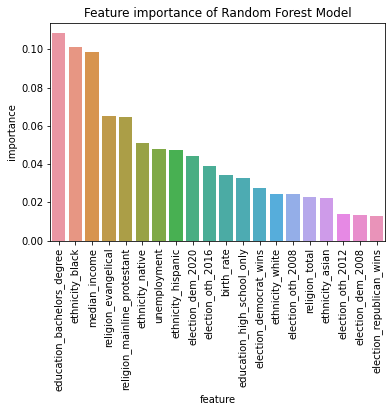

In [76]:
sns.barplot(data=random_forest_features.head(20), x='feature', y='importance').set_title('Feature importance of Random Forest Model')
_ = plt.xticks(rotation=90)

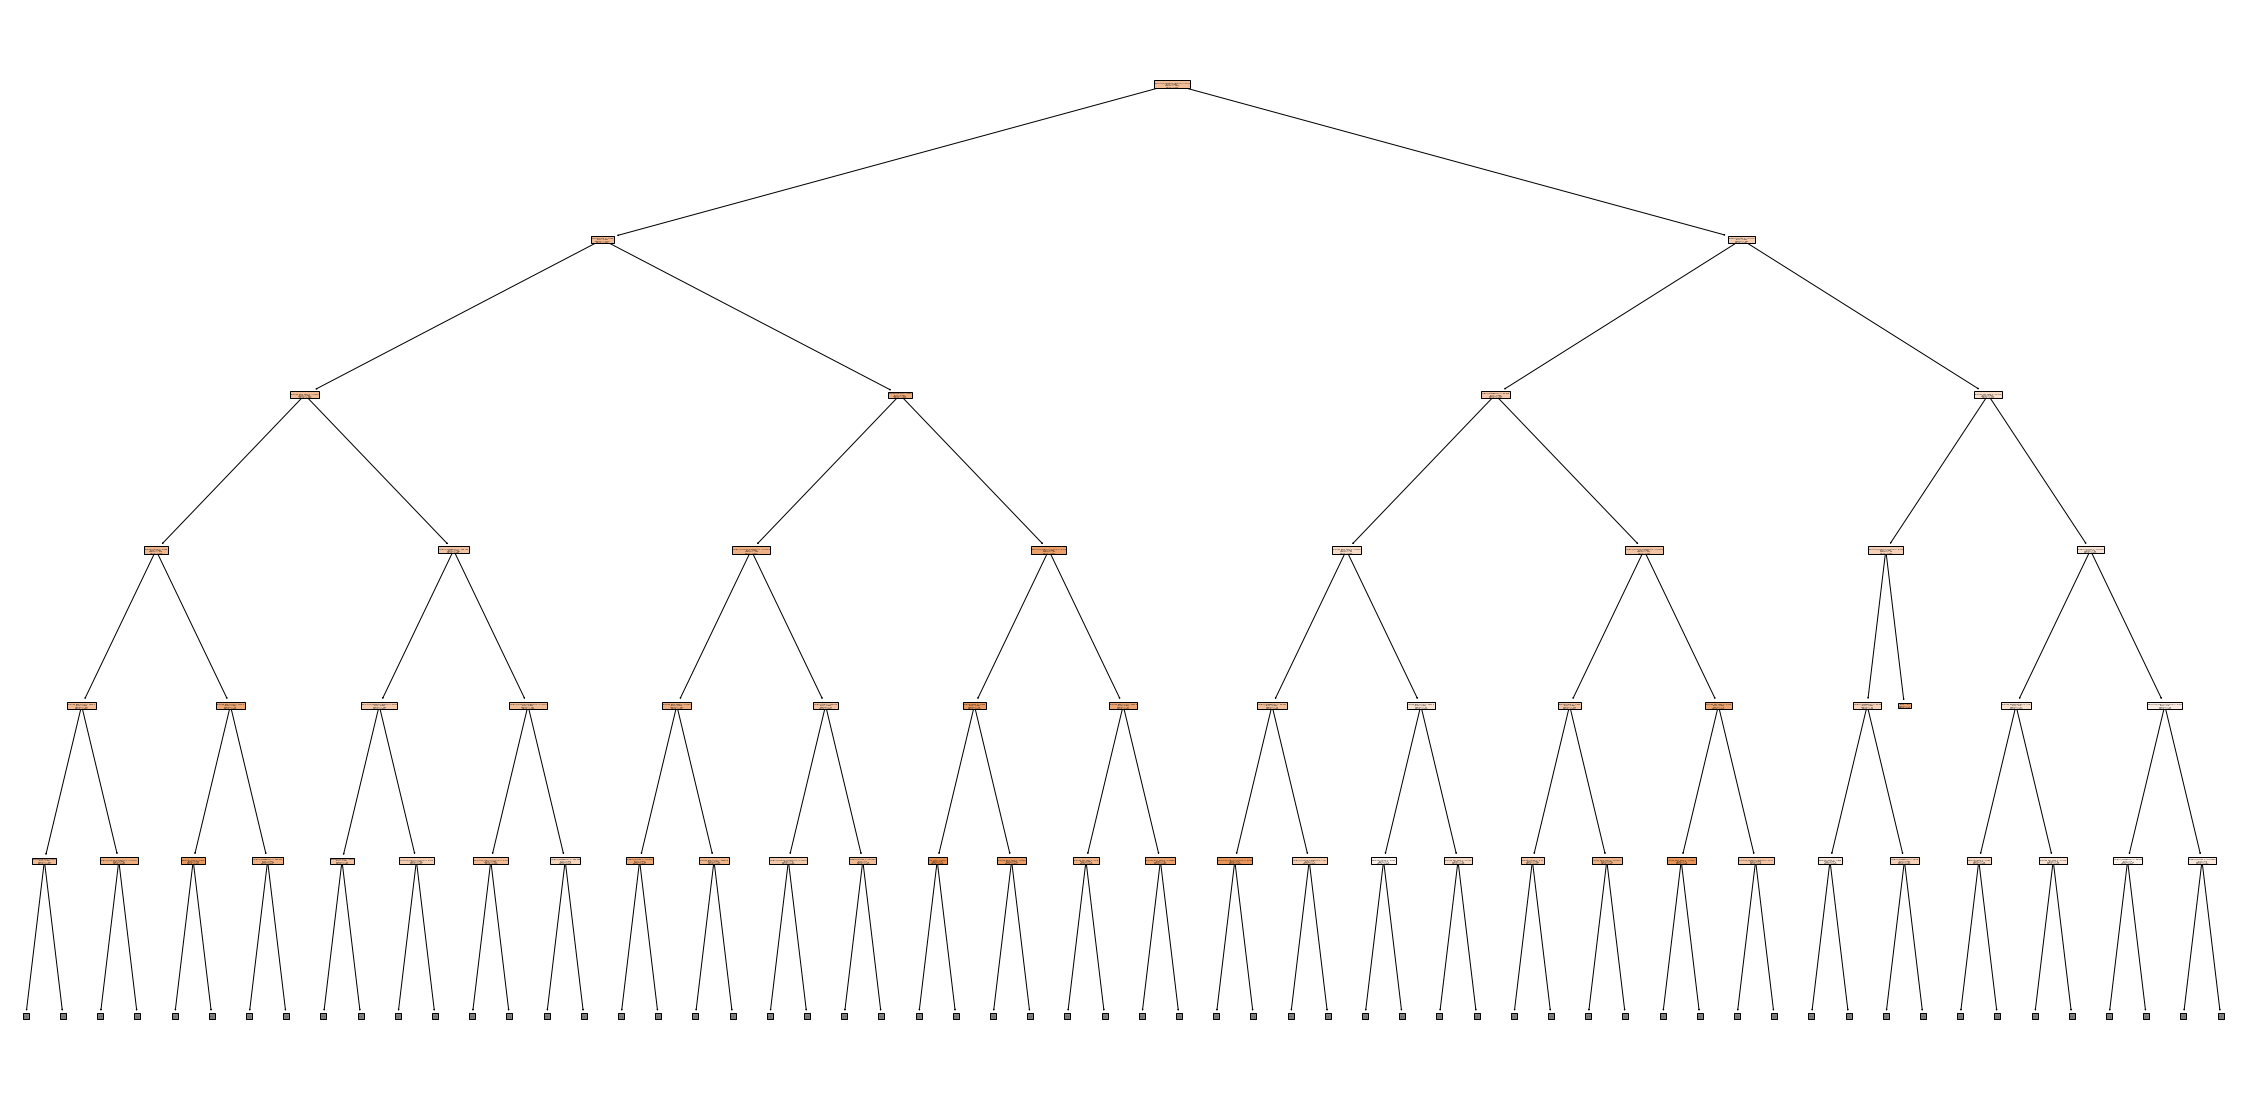

In [77]:
from sklearn import tree
plt.figure(figsize=(40,20))
_ = tree.plot_tree(random_forest.estimators_[5], feature_names=X_train.columns, filled=True, max_depth=5)
plt.show()

In [78]:
random_forest.n_estimators

100

### Tuning

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10, 300, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')}

# grid_search = GridSearchCV(random_forest, parameters, scoring='neg_mean_absolute_error')
# grid_search.fit(X_train_scaled, y_train)

# print('Grid SearchCV optimized random forest model best score: ', round(grid_search.best_score_, 5))
# print('Grid SearchCV optimized random frest model best estimator: ', grid_search.best_estimator_)

We note that the increase in the test scores from doing an exhaustive (several hour) GridSearchCV tuning on our random forest model was marginal at best.

### Testing

In [80]:
test_linear = linear_regression.predict(X_test_scaled)
test_lasso = lasso.predict(X_test_scaled)
test_random_forest = random_forest.predict(X_test_scaled)
# test_random_forest_tuned = grid_search.best_estimator_.predict(X_test_scaled)

In [81]:
from sklearn.metrics import mean_absolute_error, r2_score


print('Linear regression -\t Mean absolute error: ', round(mean_absolute_error(y_test, test_linear), 5), '\tR^2:', round(r2_score(y_test, test_linear), 5))
print('Lasso model -\t Mean absolute error: ', round(mean_absolute_error(y_test, test_lasso), 5), '\tR^2:', round(r2_score(y_test, test_lasso), 5))
print('Random forest -\t Mean absolute error: ', round(mean_absolute_error(y_test, test_random_forest), 5), '\tR^2:', round(r2_score(y_test, test_random_forest), 5))
print('1/2 linear + 1/2 random forest\t - Mean absolute error: ', round(mean_absolute_error(y_test, (test_linear + test_random_forest) / 2), 5), '\tR^2:', round(r2_score(y_test, (test_linear + test_random_forest) / 2), 5))

Linear regression -	 Mean absolute error:  0.30351 	R^2: -94.55557
Lasso model -	 Mean absolute error:  0.07637 	R^2: -2.80946
Random forest -	 Mean absolute error:  0.03809 	R^2: -0.14965
1/2 linear + 1/2 random forest	 - Mean absolute error:  0.14875 	R^2: -22.29022
